# Sorting accuracy

## Setup

activate `npx_10m_384ch_unit_classes`

In [2]:
# SETUP PACKAGES 
%load_ext autoreload
%autoreload 2
import os
import numpy as np
from matplotlib import pyplot as plt

# SET PROJECT PATH
PROJ_PATH = "/gpfs/bbp.cscs.ch/project/proj85/home/laquitai/preprint_2023"
os.chdir(PROJ_PATH)
from src.nodes.utils import get_config
from src.nodes.postpro.accuracy import get_sorting_accuracies


# BUCCINO 2020
EXPERIMENT = "buccino_2020"
SIMULATION_DATE = "2020"
data_conf, _ = get_config(EXPERIMENT, SIMULATION_DATE).values()
BUCCI_KS3_SORTING_PATH = data_conf["sorting"]["sorters"]["kilosort3"]["output"]
BUCCI_GT_SORTING_PATH = data_conf["sorting"]["simulation"]["ground_truth"]["output"]

# # npx-32-10Hz
# EXPERIMENT = "silico_neuropixels"
# SIMULATION_DATE = "2023_02_19"
# data_conf, _ = get_config(EXPERIMENT, SIMULATION_DATE).values()
# OUR_KS3_SORTING_PATH = data_conf["sorting"]["sorters"]["kilosort3"]["output"]
# OUR_GT_SORTING_PATH = data_conf["sorting"]["simulation"]["ground_truth"]["output"]


# SET PROJECT PATH
PROJ_PATH = "/gpfs/bbp.cscs.ch/project/proj85/home/laquitai/preprint_2023"
os.chdir(PROJ_PATH)

from src.nodes.utils import get_config
from src.nodes.postpro.accuracy import get_sorting_accuracies

# npx-384-40KHz (to maximize sorting accuracy see SUPP. FIG)
EXPERIMENT = "silico_neuropixels"
SIMULATION_DATE = "2023_10_18"
data_conf_2023_10_18, _ = get_config(EXPERIMENT, SIMULATION_DATE).values()
KS3_SORTING_PATH_2023_10_18 = data_conf_2023_10_18["sorting"]["sorters"]["kilosort3"]["output"]
GT_SORTING_PATH_2023_10_18 = data_conf_2023_10_18["sorting"]["simulation"]["ground_truth"]["output"]


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Unit sorting accuracies

In [2]:
# takes 11 min

# get buccino accuracies
bucci_accuracies = get_sorting_accuracies(BUCCI_GT_SORTING_PATH, BUCCI_KS3_SORTING_PATH)
bucci_acc_array = np.array(bucci_accuracies)

# get npx32 accuracies
# npx32_accuracies = get_sorting_accuracies(OUR_GT_SORTING_PATH, OUR_KS3_SORTING_PATH)
# npx32_acc_array = np.array(npx32_accuracies)

# get 2023_10_18 accuracies
accuracies_2023_10_18 = get_sorting_accuracies(
    GT_SORTING_PATH_2023_10_18, KS3_SORTING_PATH_2023_10_18
)
acc_array_2023_10_18 = np.array(accuracies_2023_10_18)

/tmp/ipykernel_209466/1979538411.py:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  ax.plot(npx32_acc_array, "r", label=f"npx32 (10KHz, n={len(npx32_accuracies)})", linestyle="-", marker="o", markerfacecolor="w", markeredgecolor=[1,0,0], color=[.9,0,0], markersize=MARKERSIZE, markeredgewidth=0.4, linewidth=1);


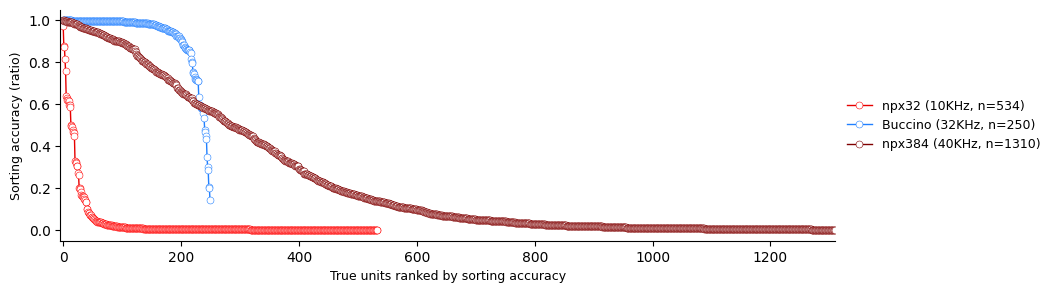

In [4]:
# count units
n_units = max(
    [len(npx32_accuracies), len(accuracies_2023_10_18), len(bucci_accuracies)]
)

MARKERSIZE = 5

# plot accuracy (agreement score)
# fig, axis = plt.subplots(1,1,figsize=(6,4))
fig, ax = plt.subplots(1, 1, figsize=(10, 3))

# plot
ax.plot(
    npx32_acc_array,
    "r",
    label=f"npx32 (10KHz, n={len(npx32_accuracies)})",
    linestyle="-",
    marker="o",
    markerfacecolor="w",
    markeredgecolor=[1, 0, 0],
    color=[0.9, 0, 0],
    markersize=MARKERSIZE,
    markeredgewidth=0.4,
    linewidth=1,
)
ax.plot(
    bucci_acc_array,
    label=f"Buccino (32KHz, n={len(bucci_acc_array)})",
    linestyle="-",
    marker="o",
    markerfacecolor="w",
    color=(0.13, 0.50, 1),
    markersize=MARKERSIZE,
    markeredgewidth=0.4,
    linewidth=1,
)
ax.plot(
    acc_array_2023_10_18,
    label=f"npx384 (40KHz, n={len(acc_array_2023_10_18)})",
    marker="o",
    markerfacecolor="w",
    markeredgecolor=[0.5, 0, 0],
    color=[0.5, 0, 0],
    linestyle="-",
    markersize=MARKERSIZE,
    markeredgewidth=0.4,
    linewidth=1,
)

# add legend
ax.spines[["right", "top"]].set_visible(False)
ax.set_ylabel("Sorting accuracy (ratio)", fontsize=9)
ax.set_xlabel("True units ranked by sorting accuracy", fontsize=9)
ax.set_xlim([-5, n_units])
# ax.hlines(y=0.8, xmin=0, xmax=n_units, linestyle="--", color="k", linewidth=1, label="thresh. for good sorting (0.8)");
ax.legend(frameon=False, loc="center left", bbox_to_anchor=(1, 0.5), fontsize=9)
# ax.set_yscale("log")

# save figures
plt.savefig("figures/3_accuracy/pdf/unit_accuracies.pdf")
plt.savefig("figures/3_accuracy/svg/unit_accuracies.svg")

### Well detected units (yield)

In [6]:
DET_THRESH = 0.8
print(
    "Well detected units (npx382):",
    npx32_accuracies[npx32_accuracies >= DET_THRESH].index.tolist(),
)
print(
    "accuracy (npx32-hexO):",
    len(npx32_accuracies[npx32_accuracies >= DET_THRESH]) / len(npx32_accuracies),
)

Well detected units (npx382): [3891529, 2113524, 1808832, 2121825]
accuracy (npx32-hexO): 0.00749063670411985


In [7]:
sum(accuracies_2023_10_18 >= 0.8)

140

In [7]:
print(
    "Well detected units (npx384):",
    accuracies_2023_10_18[accuracies_2023_10_18 >= DET_THRESH].index.tolist(),
)
print(
    "accuracy (npx384-hexO1):",
    len(accuracies_2023_10_18[accuracies_2023_10_18 >= DET_THRESH])
    / len(accuracies_2023_10_18),
)

Well detected units (npx384): [236454, 2148124, 3514704, 891776, 1981516, 1852927, 1855885, 691727, 499827, 3699020, 1736462, 3891529, 2870817, 1864097, 2536998, 785113, 1860371, 1921418, 1367812, 2145865, 2061088, 1808832, 141668, 2639635, 2323761, 1912824, 1664728, 2863830, 2008365, 3936308, 1782313, 2205117, 2219300, 2892132, 1047815, 2203846, 684054, 2795437, 2473130, 2173940, 2076919, 1407814, 4068988, 4068360, 4006002, 2099479, 3743596, 1684667, 739303, 2015083, 3783050, 1469180, 1775186, 1425768, 505734, 2065572, 1813372, 3443482, 1527208, 1942643, 582918, 1916639, 1797892, 1368911, 1965751, 2401194, 1878074, 3050647, 710717, 281388, 2075781, 1860823, 1885202, 3670248, 1811293, 3517481, 1858700, 1958413, 39973, 2191079, 3800792, 2050137, 533615, 4001779, 4111550, 1972346, 4066356, 4094711, 2096886, 1972603, 3597652, 3916330, 4190026, 3450833, 1964085, 3619329, 2104770, 841273, 3575741, 858861, 4108309, 1766796, 2083630, 3951208, 3993908, 1829418, 1949894, 703841, 1799236, 251073

In [8]:
print(
    "Well detected units (Buccino):",
    bucci_accuracies[bucci_accuracies >= DET_THRESH].index.tolist(),
)
print(
    "accuracy (Buccino):",
    len(bucci_accuracies[bucci_accuracies >= DET_THRESH]) / len(bucci_accuracies),
)

Well detected units (Buccino): [56, 149, 104, 66, 150, 23, 188, 19, 80, 53, 198, 220, 178, 157, 69, 7, 211, 137, 140, 126, 44, 159, 151, 232, 31, 245, 120, 166, 229, 86, 154, 165, 172, 100, 105, 106, 21, 118, 52, 109, 14, 131, 233, 2, 217, 238, 63, 204, 117, 195, 215, 224, 169, 244, 81, 134, 209, 26, 231, 59, 114, 218, 249, 234, 16, 237, 85, 50, 122, 71, 3, 48, 65, 40, 170, 148, 89, 112, 34, 75, 163, 124, 133, 189, 123, 248, 199, 12, 95, 84, 58, 10, 144, 6, 147, 226, 82, 54, 41, 128, 111, 8, 30, 197, 236, 108, 222, 155, 239, 37, 92, 182, 203, 228, 90, 156, 94, 241, 141, 212, 35, 235, 202, 107, 28, 196, 61, 164, 187, 42, 246, 99, 243, 185, 129, 1, 29, 38, 221, 68, 119, 207, 213, 0, 210, 201, 74, 225, 70, 25, 240, 145, 227, 206, 216, 200, 168, 153, 214, 11, 219, 121, 76, 208, 142, 27, 113, 47, 230, 146, 127, 9, 242, 45, 91, 176, 13, 4, 130, 24, 18, 22, 102, 46, 191, 193, 160, 162, 171, 97, 87, 101, 36, 78, 72, 179, 135, 161, 247, 177, 192, 98, 180, 205, 17, 184, 79, 20, 175, 125, 115, 96